This notebook assumes that you've already created the file `roman.db` in the [intro to sql](intro to sql.ipynb) notebook. It shows how to load a sqlite database into R.

In [1]:
# first we get the packages we need:
library(DBI)
library(RSQLite)

In [2]:
# now we open the connection:

con = dbConnect(SQLite(), dbname="roman.db")

# we can see what's inside, eg, what tables are in the database?
alltables = dbListTables(con)
alltables



[1] "_source_info_"   "amphi"           "aqua"            "sqlite_sequence"

In [3]:
# write the query to get the information you want

myQuery <- dbSendQuery(con, "SELECT * FROM amphi WHERE chronogroup = 'flavian'")

# pass that information to an R object. The n = -1 bit means grab everything until there's nothing left to grab. Otherwise, you can specify how many rows etc.

my_data <- dbFetch(myQuery, n = -1)

my_data

Warning message in result_fetch(res@ptr, n = n):
“Column `golvinid`: mixed type, first seen values of type integer, coercing other values of type string”Warning message in result_fetch(res@ptr, n = n):
“Column `capacity`: mixed type, first seen values of type integer, coercing other values of type string”Warning message in result_fetch(res@ptr, n = n):
“Column `arenamajor`: mixed type, first seen values of type real, coercing other values of type string”Warning message in result_fetch(res@ptr, n = n):
“Column `arenaminor`: mixed type, first seen values of type real, coercing other values of type string”Warning message in result_fetch(res@ptr, n = n):
“Column `extmajor`: mixed type, first seen values of type real, coercing other values of type string”Warning message in result_fetch(res@ptr, n = n):
“Column `extminor`: mixed type, first seen values of type real, coercing other values of type string”Warning message in result_fetch(res@ptr, n = n):
“Column `exteriorheight`: mixed type, fir

id,title,label,latintoponym,pleiades,welchid,golvinid,buildingtype,chronogroup,secondcentury,⋯,modcountry,romanregion,arenamajor,arenaminor,extmajor,extminor,exteriorheight,longitude,latitude,elevation
arlesAmphitheater,Amphitheater at Arles,Arles,Arelate,https://pleiades.stoa.org/places/148217,,154,amphitheater,flavian,1,⋯,France,narbonensis,47.00,32.00,136.0,107.0,,4.631111,43.67778,21
romeFlavianAmphitheater,Flavian Amphitheater at Rome,Colosseum,,https://pleiades.stoa.org/places/423025,,152,amphitheater,flavian,1,⋯,Italy,regio-i,83.00,48.00,189.0,156.0,52.0,12.492269,41.89017,22
newsteadAmphitheater,Amphitheater at Newstead,Newstead,Trimontium,https://pleiades.stoa.org/places/89304,,0,amphitheater,flavian,1,⋯,United Kingdom,britannia,37.00,23.00,70.0,60.0,,-2.691900,55.60260,83
pozzuoliFlavianAmphitheater,Flavian Amphitheater at Pozzuoli,Pozzuoli (Flavian),Puteoli,https://pleiades.stoa.org/places/432815,,153,amphitheater,flavian,1,⋯,Italy,regio-i,74.80,42.00,149.0,116.0,,14.125315,40.82593,41
segobrigaAmphitheater,Amphitheater at Segobriga,Segobriga,Segobriga,https://pleiades.stoa.org/places/266036,,88,amphitheater,flavian,1,⋯,Spain,tarraconensis,47.00,31.00,75.0,64.0,,-2.813944,39.88602,817
parisAmphitheater,Amphitheater at Paris,Paris,Lutetia Parisiorum,https://pleiades.stoa.org/places/109126,,0,gallo-roman-amphitheater,flavian,1,⋯,France,lugdunensis,0.00,0.00,0.0,0.0,,2.352855,48.84510,46
nimesAmphitheater,Amphitheater at Nimes,Nimes,Nemausus,https://pleiades.stoa.org/places/148142,,0,amphitheater,flavian,1,⋯,France,narbonensis,69.10,38.40,133.4,101.4,,4.359599,43.83488,50
chesterAmphitheater,Amphitheater at Chester,Chester,Deva Victrix,https://pleiades.stoa.org/places/79420,,0,amphitheater,flavian,1,⋯,United Kingdom,britannia,56.70,48.30,95.5,86.6,,-2.886928,53.18908,23
arezzoAmphitheater,Amphitheater at Arezzo,Arezzo,Arretium,https://pleiades.stoa.org/places/413032,,0,amphitheater,flavian,1,⋯,Italy,regio-vii,71.90,42.70,109.4,80.0,,11.880370,43.46049,263
londonAmphitheater,Amphitheater at London,London,Londinium,https://pleiades.stoa.org/places/79574,,0,amphitheater,flavian,1,⋯,United Kingdom,britannia,60.00,40.00,100.0,85.0,,-0.092136,51.51552,29


In [8]:
# now that we're done, clear cache 
# so that we don't eat up all the memory
dbClearResult(myQuery)

# now carry on and begin manipulating my_data
# for more information see
# http://tiffanytimbers.com/querying-sqlite-databases-from-r/
# also perhaps this https://www.r-bloggers.com/using-sqlite-in-r/

In [15]:
# let's make a new dataframe with just the elevation and capacity columns
# you could have done this with an SQL query from our original database.
# here we're just going to extract from the dataframe we created above

amphi_stats <- subset(my_data, select=c("id","elevation","capacity"))

#"create new datafram called amph_stats and pass into it a subset of my_data, returning the array id, elevation, capacity"

In [16]:
amphi_stats

id,elevation,capacity
arlesAmphitheater,21,20000
romeFlavianAmphitheater,22,50000
newsteadAmphitheater,83,1500
pozzuoliFlavianAmphitheater,41,35700
segobrigaAmphitheater,817,7500
parisAmphitheater,46,15000
nimesAmphitheater,50,24000
chesterAmphitheater,23,0
arezzoAmphitheater,263,8000
londonAmphitheater,29,6500


At this point, now that you know how to get your data out of the database, you could do a number of other kinds of data manipulations; it really depends on the kind of investigation you wish to do. Consult Marwick et al [How to Do Archaeological Science Using R](https://benmarwick.github.io/How-To-Do-Archaeological-Science-Using-R/index.html).

We'll end this notebook with a simple visual plot of the data.

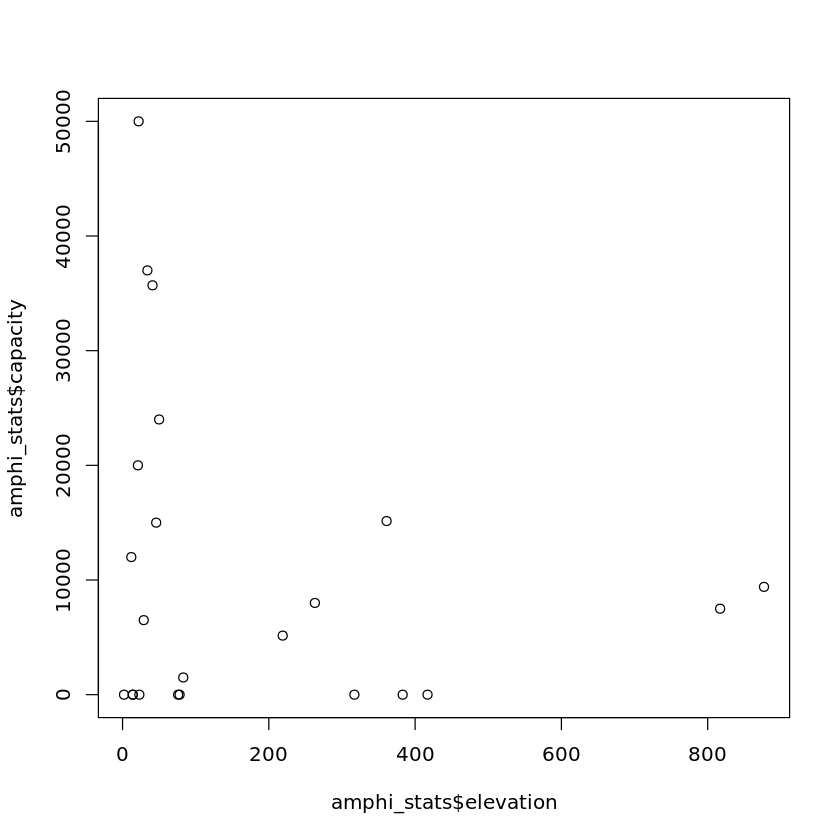

In [18]:
# a simple x,y plot
plot(amphi_stats$elevation, amphi_stats$capacity)

In [25]:
# but that's ugly. let's make it pretty

# Get the input values. 
input <- amphi_stats[,c('elevation','capacity')]

# Give the chart file a name.
png(file = "R-scatterplot.png")

# Plot the chart for cars with weight between 2.5 to 5 and mileage between 15 and 30.
plot(x = input$elevation,y = input$capacity,
   xlab = "Elevation",
   ylab = "Capacity", 
   xlim = c(0,1000),
   ylim = c(500,60000),
   main = "Elevation vs Capacity in Flavian Amphitheatres"
)
	 
# Save the file.
dev.off()



png 
  2

The scatterplot is now available if you right-click on 'jupyter' at the top of the window and open in a new browser window; you'll see it in the list of files.